<a href="https://colab.research.google.com/github/34-anish/Machine-Learning/blob/master/5_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline


In [110]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


#Plotting Age vs Income


Text(0, 0.5, 'Income($)')

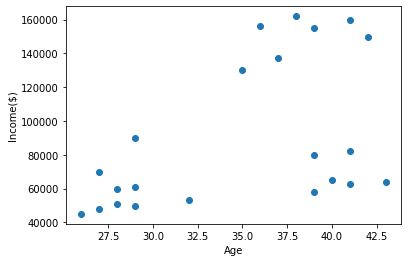

In [111]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

#Kmeans

In [112]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [113]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [114]:
df0 = df[df.cluster ==0]
df1 = df[df.cluster ==1]
df2 = df[df.cluster ==2]

In [115]:
km.cluster_centers_[0,0]

34.0

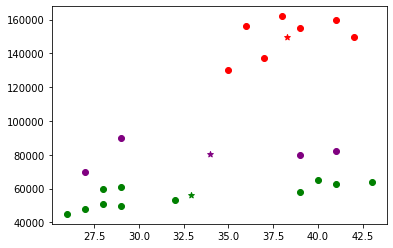

In [116]:
plt.scatter(df0.Age,df0['Income($)'],color ='purple')
plt.scatter(df1.Age,df1['Income($)'],color ='red')
plt.scatter(df2.Age,df2['Income($)'],color ='green')
plt.scatter(km.cluster_centers_[0,0],km.cluster_centers_[0,1],color ='purple' ,marker="*",label="centroid")
plt.scatter(km.cluster_centers_[1,0],km.cluster_centers_[1,1],color ='red' ,marker="*",label="centroid")
plt.scatter(km.cluster_centers_[2,0],km.cluster_centers_[2,1],color ='green',marker="*",label="centroid")


In [117]:
km.inertia_

1577046058.883117

In [118]:
sse = []
for i in range(1,10):
  km = KMeans(n_clusters = i)
  km.fit(df[['Age','Income($)']])
  sse.append(km.inertia_)

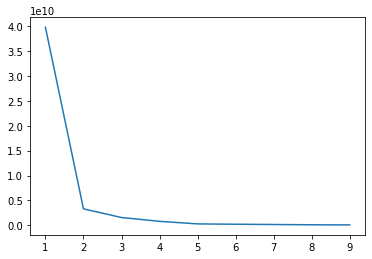

In [119]:
plt.plot(range(1,10),sse)

I specifically have a problem with the green cluster
which is occuring due to the varitaion in the x-axis' data and y-axis' data
 *So, scaling of the data is necessary*



In [120]:
from sklearn.preprocessing import MinMaxScaler

In [121]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']]) 
df['Scaled_Income'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']]) 
df['Scaled_Age'] = scaler.transform(df[['Age']])


In [122]:
df.head()

,Name,Age,Income($),cluster,Scaled_Income,Scaled_Age
0,Rob,27,70000,0,0.213675,0.058824
1,Michael,29,90000,0,0.384615,0.176471
2,Mohan,29,61000,2,0.136752,0.176471
3,Ismail,28,60000,2,0.128205,0.117647
4,Kory,42,150000,1,0.897436,0.941176


Text(0, 0.5, 'Scaled_Income($)')

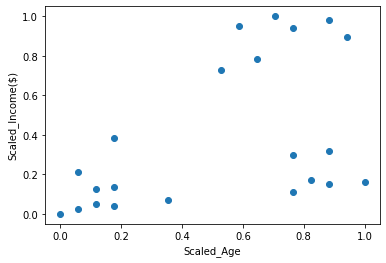

In [123]:
plt.scatter(df['Scaled_Age'],df['Scaled_Income'])
plt.xlabel('Scaled_Age')
plt.ylabel('Scaled_Income($)')

In [124]:
km_scaled = KMeans(n_clusters = 3)
y_predicted = km_scaled.fit_predict(df[['Scaled_Age','Scaled_Income']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [125]:
df.cluster_scaled = y_predicted

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [126]:
df_scaled0 = df[df.cluster_scaled == 0]
df_scaled1 = df[df.cluster_scaled == 1]
df_scaled2 = df[df.cluster_scaled == 2]

In [127]:
df_scaled0.head()


,Name,Age,Income($),cluster,Scaled_Income,Scaled_Age
16,Dipika,40,65000,2,0.170940,0.823529
17,Priyanka,41,63000,2,0.153846,0.882353
18,Nick,43,64000,2,0.162393,1.000000
19,Alia,39,80000,0,0.299145,0.764706
20,Sid,41,82000,0,0.316239,0.882353


In [130]:
km_scaled.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

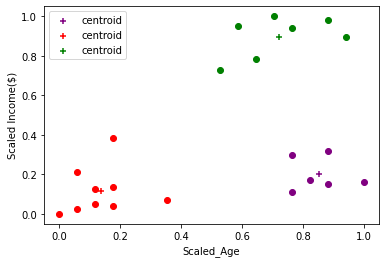

In [136]:
plt.scatter(df_scaled0['Scaled_Age'],df_scaled0['Scaled_Income'],color='purple')
plt.scatter(km_scaled.cluster_centers_[0,0],km_scaled.cluster_centers_[0,1],color='purple',marker='+',label="centroid")
plt.scatter(km_scaled.cluster_centers_[1,0],km_scaled.cluster_centers_[1,1],color='red',marker='+',label="centroid")
plt.scatter(km_scaled.cluster_centers_[2,0],km_scaled.cluster_centers_[2,1],color='green',marker='+',label="centroid")

plt.scatter(df_scaled1['Scaled_Age'],df_scaled1['Scaled_Income'],color='red')
plt.scatter(df_scaled2['Scaled_Age'],df_scaled2['Scaled_Income'],color='green')
plt.xlabel("Scaled_Age")
plt.ylabel("Scaled Income($)")
plt.legend()

#Plotting elbow

In [141]:
sse_s = []
for i in range(1,10):
  km_scaled = KMeans(n_clusters = i)
  km_scaled.fit(df[['Scaled_Age']],df[['Scaled_Income']])
  sse_s.append(km_scaled.inertia_)

Text(0, 0.5, 'SSE')

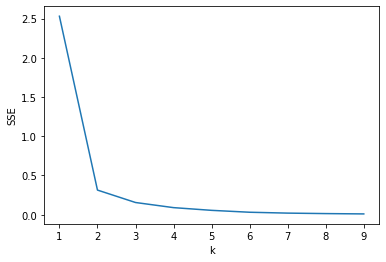

In [144]:
plt.plot(range(1,10),sse_s)
plt.xlabel('k')
plt.ylabel('SSE')

#Clustering in the Iris flower dataset

In [145]:
from sklearn import datasets

In [146]:
iris = datasets.load_iris()

In [149]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [152]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


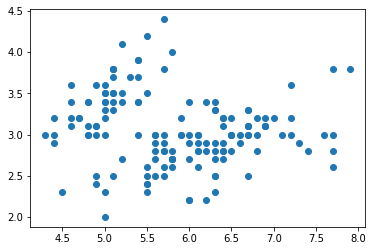

In [154]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])

In [161]:
scaler = MinMaxScaler()
scaler.fit(df[['sepal length (cm)']])
df['sepal length (cm)']=scaler.transform(df[['sepal length (cm)']])
scaler.fit(df[['sepal width'sepal length (cm (cm)']])
df['sepal width (cm)']=scaler.transform(df[['sepal width (cm)']])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,1.4,0.2
1,0.166667,0.416667,1.4,0.2
2,0.111111,0.500000,1.3,0.2
3,0.083333,0.458333,1.5,0.2
4,0.194444,0.666667,1.4,0.2


In [166]:
km = KMeans(n_clusters = 3)
y_predicted= km.fit_predict(df[['sepal length (cm)','sepal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [169]:
df = df.iloc[:,0:2]
df.head()

,sepal length (cm),sepal width (cm)
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667


In [172]:
df['cluster'] = y_predicted
df.head()

,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1


#Ploting

In [174]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

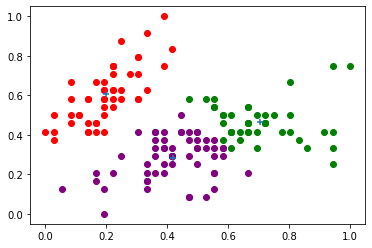

In [178]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'purple')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'red')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color = 'green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='+')

In [182]:
sse   = []
for  i in range (1,10):
  km = KMeans(n_clusters = i)
  km.fit_predict(df[['sepal length (cm)','sepal width (cm)']])
  sse.append(km.inertia_)
  

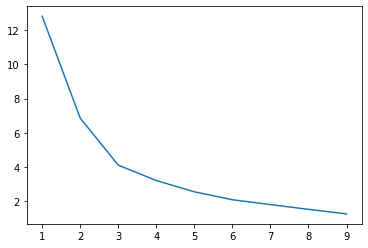

In [183]:
plt.plot(range(1,10),sse)